<center><h1>Final Report for I369 "Performance Analytics" Group 4</h1>

### Libraries used in the notebook

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.axis import Axis as ax
import numpy as np
import pandas as pd
from urllib.request import Request, urlopen
import time
import random
from matplotlib import gridspec
from bs4 import BeautifulSoup

<center><h1>Analysis of the College Football Landscape from 1935 - 2021</h1>
 <h2>by Zachary Tackett and Hayden Krebs</h2> </center>

<center><h2>Data collection and extraction</h2></center>
<p>
The web site of https://www.sports-reference.com/cfb/years/ contains an archive of college football national champions and seasons from the years 1869 - 2021.
</p>

<p>
In our groups example below, the script is applied only to college football years from 1935 - 2021. 
</p>

<p>
The data is organized by year and stored in a folder called CFB. Each year from 1935 - 2021 represents a different webpage downloaded in the folder. The table of each year in college football can be accesed with the url https://www.sports-reference.com/cfb/years/. The url format is self-explanatory. To access a certain year in the table you would simply put year.html afer years/ in the url above.
</p>

<p>
To be able to acess and pull information about a specific year of college football, we need to access the content of the page of that year. For example, the url https://www.sports-reference.com/cfb/years/2021.html points to the page containing the tables of conference summaries and award winner from the college football year 2021. For each year we can parse through the tables on the webpage to find data about a certain year simply by collecting data from each row of the table. 
</p>

<p>
The script uses multiple functions to parse and hold data from the webpages. A description of each parser follows. 
</p>

<p>
The function parse_years reads in data from the downloaded webpages. It then finds the table named all_awards. We then find all of the rows, and from the rows we parse through and find all of the th values. From here, we get the text that are in these th tags, or the names of awards. We make a list of the names of all the awards from a given year then return the count of the number of elements in the list. This number gives us the total number of awards for a given year.
</p>

<p>
The function find_school parses through the downloaded data, finding the table named all_awards. We then find all the data in tr. Using a for loop we find all of the td tags in the table rows. The for loop then decides if the values have a length above 0 so not an empty string. Inside the loop we make a dictionary which counts the amount of awards each school won in a given year. If the school doesn't exist in the dictionary, it sets its value == 1, if it exists it adds to the value by +1. We then return the amount of schools that are in this dictionary to give us the amount of schools that won awards for that year. 
</p>


<p>
The function parse_sos parses through the downloaded data, and finds the table named conferences. We then find all of the td tags. After this, we run a for loop to return the td tags in the correct column labled sos, manually. We then get the text and append to the list. We then find the index of the largest strength of schedule and turn it into a float instead of a string. (this is necesssary for matching the win percentage in a later function)
</p>

<p>
The function find_index finds the index of the highest strength of schedule.  
</p>

<p>
The function max_sos adds the strength of schedule of each conference for a certain year to a list and returns the max.
</p>

<p>
The function parse_winperc parses through the downloaded data and finds the table with the name conferences. We then find all td tags and then follow the same patterns as in the function parse_sos to find all the td tags in the win percentage column, manually. We then append the returned td tags into a list and then turn the strings into floats. We return the td tag that matches the index of the highest strength of schedule for that year. 
</p>


<p>
 The function parse_schools is parsing through the downloaded webpages, finding the amount of schools for each conference, and is adding those schools up to find the total amount of schools in college football for each year. 
</p>

In [2]:
##download webpages

for y in range (1935, 2022, 1):
    
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    
    url = 'https://www.sports-reference.com/cfb/years/'+ str(y) +'.html'
    print ('Download from :', url)
    
    #download
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()


    fileout = 'CFB/'+str(y)+'.html'
    print ('Save to : ', fileout, '\n')

    #save file to disk
    f = open(fileout,'w')
    f.write(html.decode('utf-8'))
    f.close()

Sleep for  4.88958522912816  seconds
Download from : https://www.sports-reference.com/cfb/years/1935.html
Save to :  CFB/1935.html 

Sleep for  3.579285267861052  seconds
Download from : https://www.sports-reference.com/cfb/years/1936.html
Save to :  CFB/1936.html 

Sleep for  0.8728385921573301  seconds
Download from : https://www.sports-reference.com/cfb/years/1937.html
Save to :  CFB/1937.html 

Sleep for  4.784742342307781  seconds
Download from : https://www.sports-reference.com/cfb/years/1938.html
Save to :  CFB/1938.html 

Sleep for  3.184074615204638  seconds
Download from : https://www.sports-reference.com/cfb/years/1939.html
Save to :  CFB/1939.html 

Sleep for  3.0951776549168883  seconds
Download from : https://www.sports-reference.com/cfb/years/1940.html
Save to :  CFB/1940.html 

Sleep for  1.4847362143092413  seconds
Download from : https://www.sports-reference.com/cfb/years/1941.html
Save to :  CFB/1941.html 

Sleep for  4.5287379456528525  seconds
Download from : https

Downloaded data is stored in a folder called CFB. Each year from 1935 - 2021 represents a different webpage in the folder. This way, we can parse through each different year's webpage to find data unique to a specific year. 

In [3]:
##parse

def parse_years(year):
    awards = []
    url = 'CFB/'+ str(year) +'.html'
    soup = BeautifulSoup(open(url), 'lxml')
    table = soup.find_all('table', id = 'all_awards')[0]
    rows = table.find_all('tr')
    for y in range(1,len(rows)):
        columns = rows[y].find('th')
        award = columns.get_text()
        awards.append(award)
    count = len(awards)
    return count

###################################

def find_school(year):
    schools = {}
    url = 'CFB/'+ str(year) +'.html'
    soup = BeautifulSoup(open(url), 'lxml')
    table = soup.find_all('table', id = 'all_awards')[0]
    rows = table.find_all('tr')
    for row in rows:
        school = row.find_all('td')
        if len(school)>0:
            if school[1].get_text() in schools:
                schools[school[1].get_text()] +=0
            else:
                schools[school[1].get_text()] = 1
    values = schools.values()
    total_schools = sum(values)
    return total_schools

###################################

def parse_sos(year):
    sos = []
    url = 'CFB/'+ str(year) +'.html'
    soup = BeautifulSoup(open(url), 'lxml')
    table = soup.find_all('table', id = 'conferences')[0]
    rows = table.find_all('td')
    for y in range(13, len(rows), 17):
        sos.append(rows[y].get_text())
        index_max = sos.index(max(sos))
    new_sos = [float(idx) for idx in sos]
    return new_sos

###################################

def find_index(year):
    awards = []
    for i in parse_sos(year):
        awards.append(i)
    index_max = awards.index(max(awards))
    return index_max

###################################

def max_sos(year):
    highest_sos = []
    for i in parse_sos(year):
        highest_sos.append(i)
    return max(highest_sos)

###################################

def parse_winperc(year):
    win = []
    url = 'CFB/'+ str(year) +'.html'
    soup = BeautifulSoup(open(url), 'lxml')
    table = soup.find_all('table', id = 'conferences')[0]
    rows = table.find_all('td')
    for y in range(6, len(rows), 17):
        win.append(rows[y].get_text().strip())
    new_win = [float(idx) for idx in win]
    return new_win[find_index(year)]

##########################################

def parse_schools(year):
    schools = []
    int_schools = []
    url = 'CFB/'+ str(year) +'.html'
    soup = BeautifulSoup(open(url), 'lxml')
    table = soup.find_all('table', id = 'conferences')[0]
    rows = table.find_all('td')
    for row in rows:
        if row.get('data-stat') == "school_count":
            schools.append(row.get_text())
    for school in schools:
        int_schools.append(int(school))
    return sum(int_schools)  

##########################################


<center><h1>Data analysis</h1>

<center><h2>Scatter plot of highest conference S.O.S per year vs. conference win percentage, and total number of awards vs. schools that won awards</h2>

<p>
For our first example of data analysis, we use an array to store the win percentages correlating to the highest S.O.S on the x-axis, and the highest S.O.S from each year on the y-axis. For our second example of data analysis, we use an array to store the the number of schools who won at least one award in a given year on the x-axis, and the total amount of awards for that year on the y-axis.
</p>

In [4]:
x, y = np.array([]), np.array([])

for z in range (1935, 2022, 1):
    x = np.append(x, find_school(z))
    y = np.append(y, parse_years(z))
    
# Scatter plot
z, v = np.array([]), np.array([])

for m in range (1936, 1993, 1):
    z = np.append(z,parse_winperc(m))
    v = np.append(v,max_sos(m))

<p>
After we have established the values that we want to put on each axis, we then vizualize the data. We perform a line of best fit to show correlation between the seperate variables. ** For our first graph comparing S.O.S and Win Percentage the time frame is based on the AP Poll and Basic Bowl Era from 1936 - 1992. **
</p>

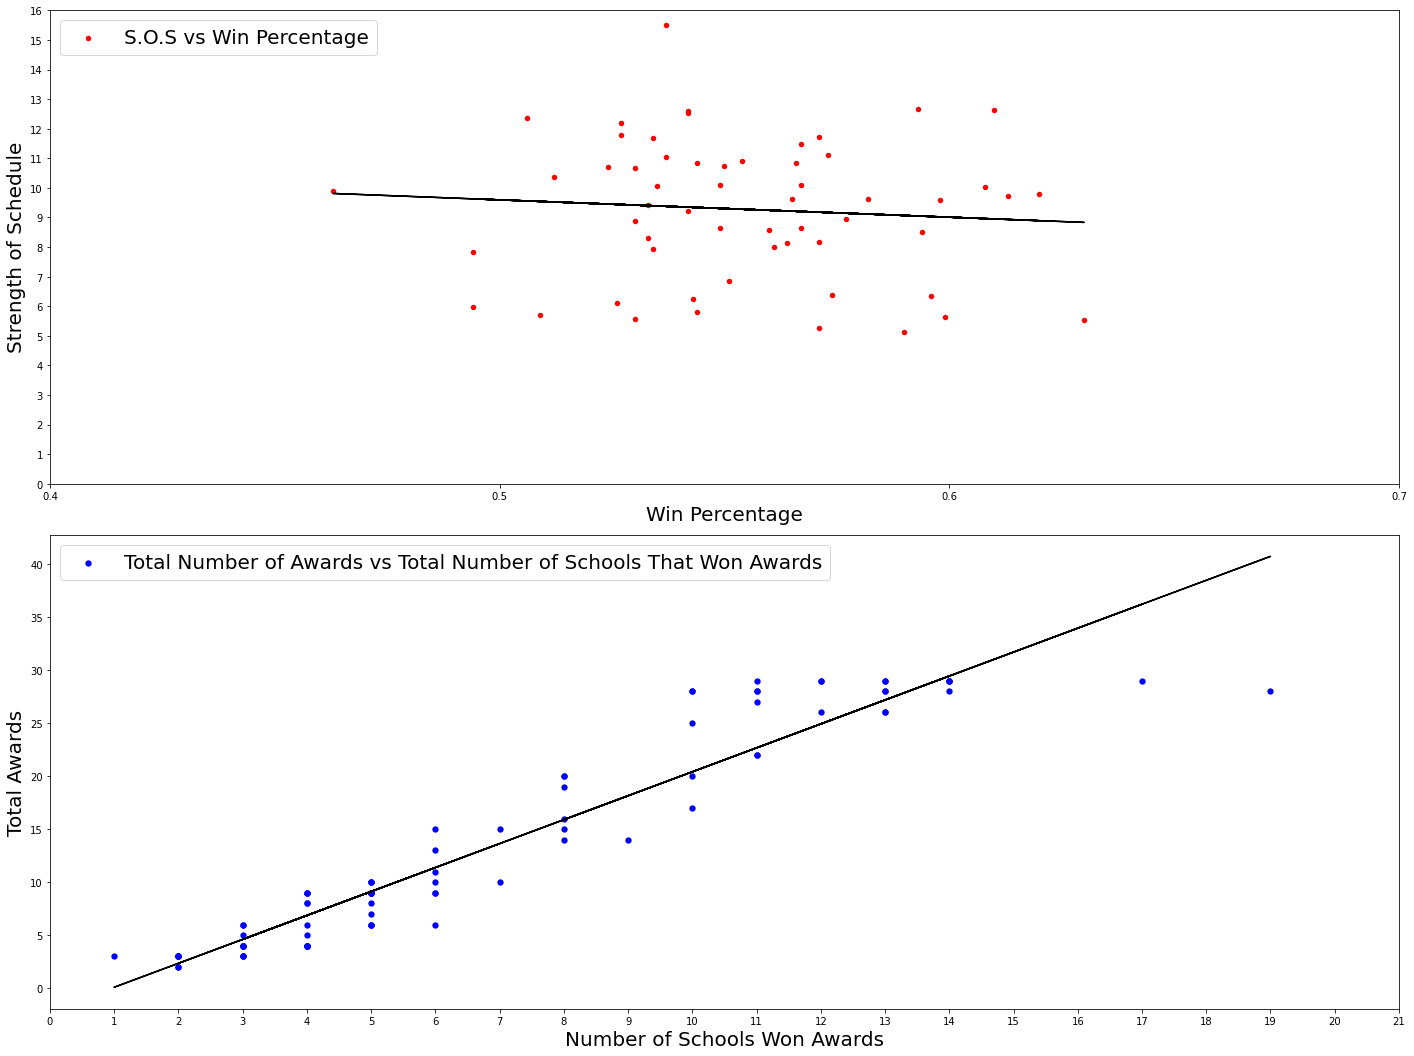

In [5]:
# Scatter plot
#fig, axarr = plt.subplots(2, dpi=100, figsize=(10, 5), sharex=True)
fig, (axes1, axes2) = plt.subplots (2,1,figsize= (20,15))
plt.tight_layout(pad=3.0)

a, b = np.polyfit(z, v, 1)
axes1.scatter(z,v, label='S.O.S vs Win Percentage', color = 'Red', s=30, alpha=1, linewidth=0)
axes1.plot(z, a * z+b, color = 'k')
axes1.set_xlabel('Win Percentage', fontsize=20)
axes1.set_ylabel('Strength of Schedule', fontsize=20)
listOf_Xticks1 = np.arange(.4, .8, .1)
axes1.set_xticks(listOf_Xticks1)
listOf_yticks1 = np.arange(0, 17, 1)
axes1.set_yticks(listOf_yticks1)
axes1.legend(loc='upper left', fontsize=20, scatterpoints=1) # make a legend
    
    

a, b = np.polyfit(x, y, 1)
axes2.scatter(x,y, label='Total Number of Awards vs Total Number of Schools That Won Awards', color = 'BLue', s=40, alpha=1, linewidth=0)
axes2.plot(x, a * x+b, color = 'k')
listOf_Xticks2 = np.arange(0, 22, 1)
axes2.set_xticks(listOf_Xticks2)
axes2.set_xlabel('Number of Schools Won Awards', fontsize=20)
axes2.set_ylabel('Total Awards', fontsize=20)
axes2.legend(loc='upper left', fontsize=20, scatterpoints=1) # make a legend

The above figure shows a negative correlation between the highest conference S.O.S for a given year and that conferences win percentage. What this figure can tell us is that the higher the S.O.S, the lower a conferences win percentage is for a given year. Vice versa, the lower the S.O.S, the higher a conferences win percentage is for a given year. The bottom figure shows a fairly strong positive correlation between the total amount of awards for a given year and the number of schools that won an award for that year. This figure tells us that most of the time, a higher number of awards for a given year in college football leads to a greater number of teams winning awards. 

<center><h1>Data analysis #2</h1>

<center><h2>Probability Distribution of number of awards and scatter plot of number of awards per school for each year of college football. </h2>

For our data analysis #2, we contstruct lists to use for our probability distribution and histogram. The x variable represents each year from 1935 - 2021 to use on the x-axis of our number of awards per school across each year histogram. The y variable represents the number of awards won each year, which we use in our measure_probability_function to help us find the probability distribution of these values. The z variable represents total number of awards in a given year divided by the total number of schools in that year. These values are used on the y-axis of our number of awards per school across each year histogram. 

In [6]:
x = [year for year in range(1935, 2022, 1)]
y = [parse_years(year) for year in range(1935, 2022, 1)]
z = [parse_years(year) / parse_schools(year) for year in range(1935, 2022, 1)]

This part of the script defines our probability distribution function. We found the probability of college football having a certain number of winnable awards 

In [7]:
def measure_probability_distribution(y):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in y:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance

<BarContainer object of 23 artists>

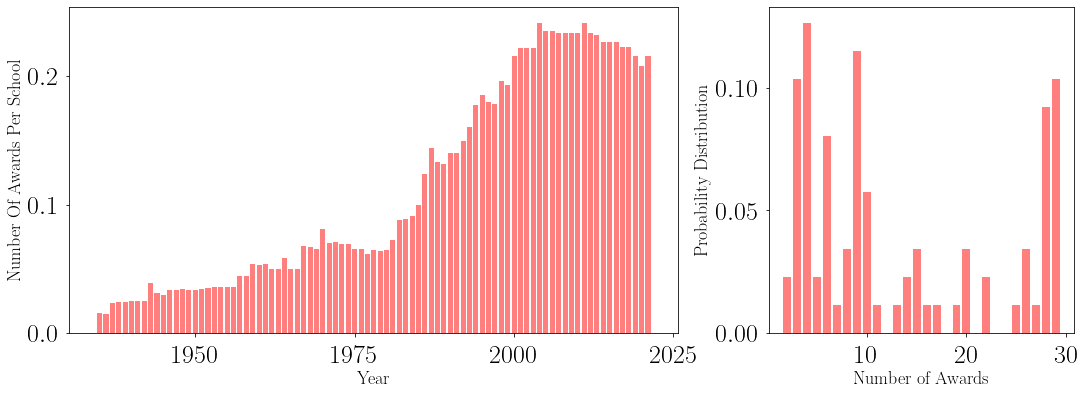

In [8]:
fig = plt.figure()
fig.set_size_inches(18,6)
plt.rc('text', usetex=True)
plt.rc('font', size=26, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])


y_label = 'Number Of Awards Per School'
x_label = 'Year'
fontsize = 18
ax1.set_xlabel(x_label, fontsize=fontsize)
ax1.set_ylabel(y_label, fontsize=fontsize)
ax1.bar(x, z, color='r', align='center', alpha=0.5)

ax1.locator_params(nbins=4)
ax2.locator_params(nbins=4)

x_label2 = 'Number of Awards'
y_label2 = 'Probability Distribution'
ax2.set_xlabel(x_label2, fontsize=fontsize)
ax2.set_ylabel(y_label2, fontsize=fontsize)
#print (x, y)
pdf, average_value, variance = measure_probability_distribution (y)
x = []
Px = []
for q in pdf:
    x.append(q)
    Px.append(pdf[q])
ax2.bar(x, Px, color = 'red', align='center', alpha=0.5)

#ax1.set_xlim(0, 20)
#ax1.set_ylim(0, 35)

For the graph on the left in the subplot, it represents the total number of awards from each year in college football divided by the total number of schools from each year in college football. What we can gain from this representation is that while awards raised over time due to a greater amount of schools, college football also began giving out a greater number of awards per school. While in 1935 the number of awards per school is .01563 by 2022 the number of awards per school had raised to .2154. For the graph on the right in the subplot, it represents the probability that a year in college football will have a certain amount of winnable awards. For example, the average value of winnable awards is around 13.4 for a single year in college football. The highest probability for a value of winnable awards in a single year of college football is 4 awards with a probability of .1264 while the lowest probability is .0115 for the number of awards 7, 11, 13, 16, 17, 19, 25, 27. 

<center><h1>Conclusions</h1>

<h2>
Summary of the results:
</h2>   

<p>In summary, we took away that the number of awards for each year has increased significantly. This is most likely due to the fact that over the years there has been a growing number of great college football players therefore leading to more awards being named after these players. All though there is a growing number of awards, the number of awards per school has fluctuated around .2 for the past 21 years, since 2000. Before 2000, the number of awards per school was much lower. Not only has college football gave out more awards, but the number of schools in college football has not elevated much at all. This leads to the number of awards per school to be higher in this era of college football opposed to other, older eras. Additionally, we found that the higher S.O.S for a certain conference, the lower their Win % is. This makes sense, but it's interesting to see that negative correlation between S.O.S and Win % is not steep at all.  </p>

<h2>
Additional comments and possible future analyses:
</h2>

<p>This project was fun for us. For future analyses, one could compare the conferences and their performance over time in college football. It would be intriguing to see if the same conferences perform well every year, or if it differs from year to year. Another future analyses could be comparing if the best conferences from each year have the most award winners, or how the distrubution of award winners per conference works out </p>